In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

In [63]:
final_dump = []
with open(
        "/home/btrabucco/research/im2txt/im2txt/data/final_dump.pkl",
        "rb") as f:
    while True:
        try:
            final_dump += [pkl.load(f)]
        except EOFError:
            break

In [64]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [65]:
all_bleus = []
for e in final_dump:
    all_bleus += [
        sentence_bleu(
            nltk.word_tokenize(e["target_caption"]),
            nltk.word_tokenize(e["beam_search_captions"][0][0]),
        )]

In [66]:
final_bleu = np.mean(all_bleus)

In [67]:
print(final_bleu)

0.671211792755


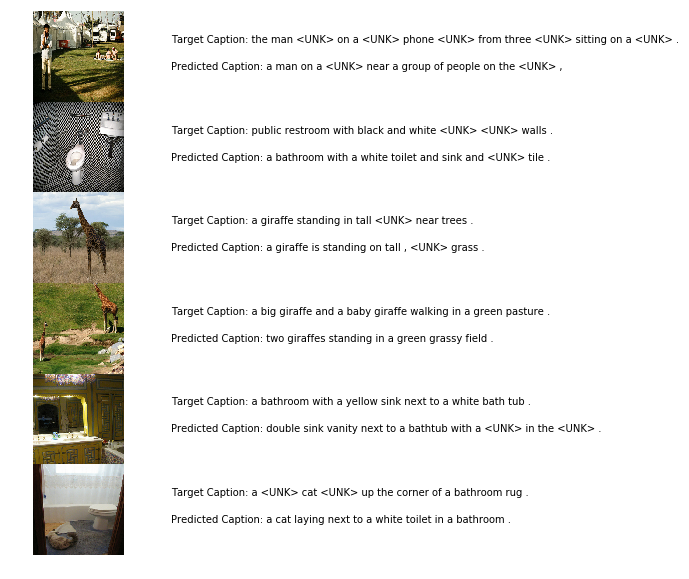

In [70]:
my_dpi = 300
f = plt.figure(1)
f.set_figheight(10)
f.set_figwidth(10)
f.subplots_adjust(hspace=0, wspace=0)

N = 6

for i in range(N):
    rnd = np.random.randint(0, high=len(final_dump))
    e = final_dump[rnd]
    image = e["image"]
    target = e["target_caption"].split("</S>")[0]
    caption = e["beam_search_captions"][0][0]

    plt.subplot(N, N//2, (N//2*i)+1)
    plt.axis("off")
    plt.imshow(image)

    plt.subplot(N, N//2, (N//2*i)+2)
    plt.axis("off")
    plt.text(0, 0.65, "Target Caption: " + target)
    
    plt.subplot(N, N//2, (N//2*i)+2)
    plt.axis("off")
    plt.text(0, 0.35, "Predicted Caption: " + caption)
    
plt.show()